In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [2]:
dataset = 'dataset.csv'
model_save_path = 'pose_detector.keras'

In [3]:
NUM_CLASSES = 6

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 4 + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
y_dataset = y_dataset - 1

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((4, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout (Dropout)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376 (1.47 KB)

 Trainable params: 376 (1.47 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Model checkpoint callback
# path_model = os.path.dirname(model_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 8s 836ms/step - accuracy: 0.1406 - loss: 5.6467
Epoch 1: saving model to pose_detector.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1347 - loss: 5.8778 - val_accuracy: 0.1126 - val_loss: 3.0952
Epoch 2/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1250 - loss: 4.9040
Epoch 2: saving model to pose_detector.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1417 - loss: 4.8459 - val_accuracy: 0.1645 - val_loss: 2.4057
Epoch 3/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1719 - loss: 3.6910
Epoch 3: saving model to pose_detector.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1683 - loss: 3.9296 - val_accuracy: 0.2641 - val_loss: 2.0443
Epoch 4/1000
 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.1719 - loss: 3.3504
Epoch 4: saving model to pose_detector.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1647 - loss: 3.2830 - val_accuracy: 0.2468 - val_loss: 1.8723
Epoch 5/10

In [13]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 1.1419 


In [14]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [15]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[0.3669436  0.2651815  0.05924246 0.02891394 0.21826442 0.06145403]
0


# Confussion Matrix

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


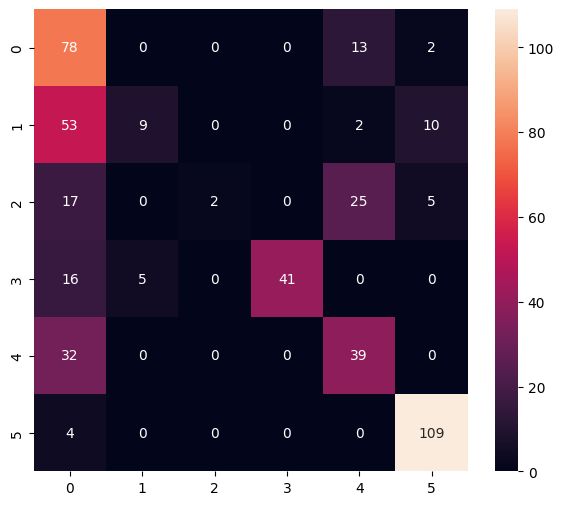

Classification Report
              precision    recall  f1-score   support

           0       0.39      0.84      0.53        93
           1       0.64      0.12      0.20        74
           2       1.00      0.04      0.08        49
           3       1.00      0.66      0.80        62
           4       0.49      0.55      0.52        71
           5       0.87      0.96      0.91       113

    accuracy                           0.60       462
   macro avg       0.73      0.53      0.51       462
weighted avg       0.71      0.60      0.56       462



In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)